In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("CreditCardFraudDataset.csv")


In [3]:
df.head()

,label,x1,x10,x11,x12,x13,x14,x15,x16,x17,...,x19,x2,x20,x3,x4,x5,x6,x7,x8,x9
0,0,5.284041,-5.624067,8.605521,8.544963,0.997656,-2.431120,-6.275338,4.107149,3.293856,...,0.347794,-8.183866,4.996699,4.427122,5.770638,0.480753,3.094189,7.081126,6.002156,-3.967035
1,0,6.437503,-7.159333,9.053143,8.086666,1.329195,-2.723613,-6.640894,5.763606,4.913189,...,2.292314,-9.030801,5.277635,4.661947,4.724572,-1.487967,4.117871,6.226025,4.423981,-3.636292
2,1,8.166886,-4.391264,2.939584,11.713214,-9.027539,-1.926944,5.705792,-9.100228,3.510292,...,9.123164,-8.608870,-7.180589,7.271488,8.303158,3.169812,-9.202563,3.827041,-8.805153,2.008317
3,2,1.254873,4.118066,5.537918,8.876809,-0.132293,1.401491,8.221282,1.733626,-6.681623,...,7.478738,3.088228,-0.154700,7.912234,6.746198,1.690053,-2.374711,4.662912,-6.455187,6.950636
4,2,-0.150247,3.668403,3.117548,10.215816,1.028585,0.872204,9.479030,1.815946,-7.709055,...,6.991231,5.737318,1.657778,7.367953,7.575167,0.255117,-4.281959,6.023513,-8.385214,7.106542


In [12]:

x=df.drop(['label'], axis=1)
y=df.label
colNames=x.columns

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
clf = RandomForestClassifier(n_jobs=2)
rfe = RFE(estimator=clf, n_features_to_select=3, step=1)
rfe.fit(x, y)
X_rfe=rfe.transform(x)
true=rfe.support_
rfecolindex=[i for i, x in enumerate(true) if x]
rfecolname=list(colNames[i] for i in rfecolindex)

In [30]:
print('Features selected :',rfecolname)

Features selected : ['x15', 'x2', 'x6']


In [31]:
from sklearn.model_selection import  train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X_rfe, y, test_size=0.33, random_state=42)

In [32]:
clf=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0,
                           warm_start=False, class_weight=None)

In [33]:
clf.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
y1_pred=clf.predict(X1_test)

In [35]:
pd.crosstab(y1_test, y1_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1,2
Actual attacks,,,
0,10,0,0
1,0,15,0
2,0,0,8


In [36]:
from sklearn.metrics import classification_report 
print("Model evaluation\n"+classification_report(y1_test,y1_pred))

Model evaluation
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        15
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        33



Automatically created module for IPython interactive environment


/home/hamza/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


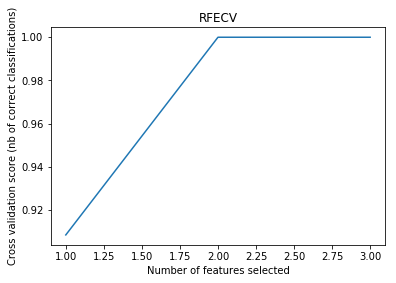

In [37]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=clf, step=1, cv=10, scoring='accuracy')
rfecv.fit(X1_test, y1_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [38]:
from sklearn.model_selection import cross_val_score
clf1=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0,
                           warm_start=False, class_weight=None)
scores = cross_val_score(clf, X_rfe, y, cv=10)

In [27]:
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00000 (+/- 0.00000)
